In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [12]:
data = pd.read_csv("API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2.csv",skiprows=3)
data.drop(columns = ["Indicator Name","Indicator Code","Unnamed: 67"],inplace=True)
data.rename(columns={"Country Name": "Country","Country Code": "Code"},inplace=True)
data["Country"] = data["Country"].str.upper()
# Rotate columns
data = pd.melt(data,id_vars = ["Country","Code"],value_vars = [str(i) for i in range(1960,2023)])
data["variable"] = data["variable"].astype(np.int32)
data.rename(columns={"variable":"Year","value":"GDP"},inplace=True)

data.head(10)

,Country,Code,Year,GDP
0,ARUBA,ABW,1960,NaN
1,AFRICA EASTERN AND SOUTHERN,AFE,1960,1.847810e+10
2,AFGHANISTAN,AFG,1960,5.377778e+08
3,AFRICA WESTERN AND CENTRAL,AFW,1960,1.041165e+10
4,ANGOLA,AGO,1960,NaN
5,ALBANIA,ALB,1960,NaN
6,ANDORRA,AND,1960,NaN
7,ARAB WORLD,ARB,1960,NaN
8,UNITED ARAB EMIRATES,ARE,1960,NaN
9,ARGENTINA,ARG,1960,NaN


In [6]:
data.to_csv("World_GDP_cleaned.csv",index = False)

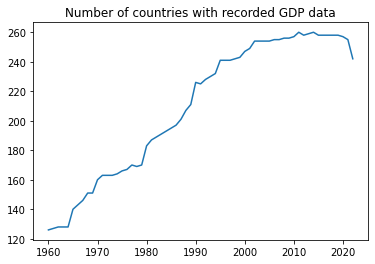

In [21]:
plt.plot(data.groupby("Year")["GDP"].count())
plt.title("Number of countries with recorded GDP data")
plt.show()